In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import numpy as np

1. **Data Collection and Processing**

In [3]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module='seaborn')
data = pd.read_csv('WineQT.csv')

In [4]:
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [5]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


Exploratory Dara Analysis(EDA)

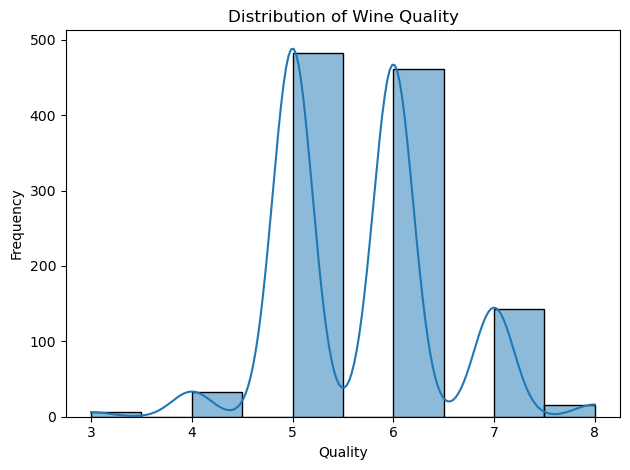

In [7]:
# Plot the distribtion of wine quality
sns.histplot(data['quality'], bins=10, kde=True)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

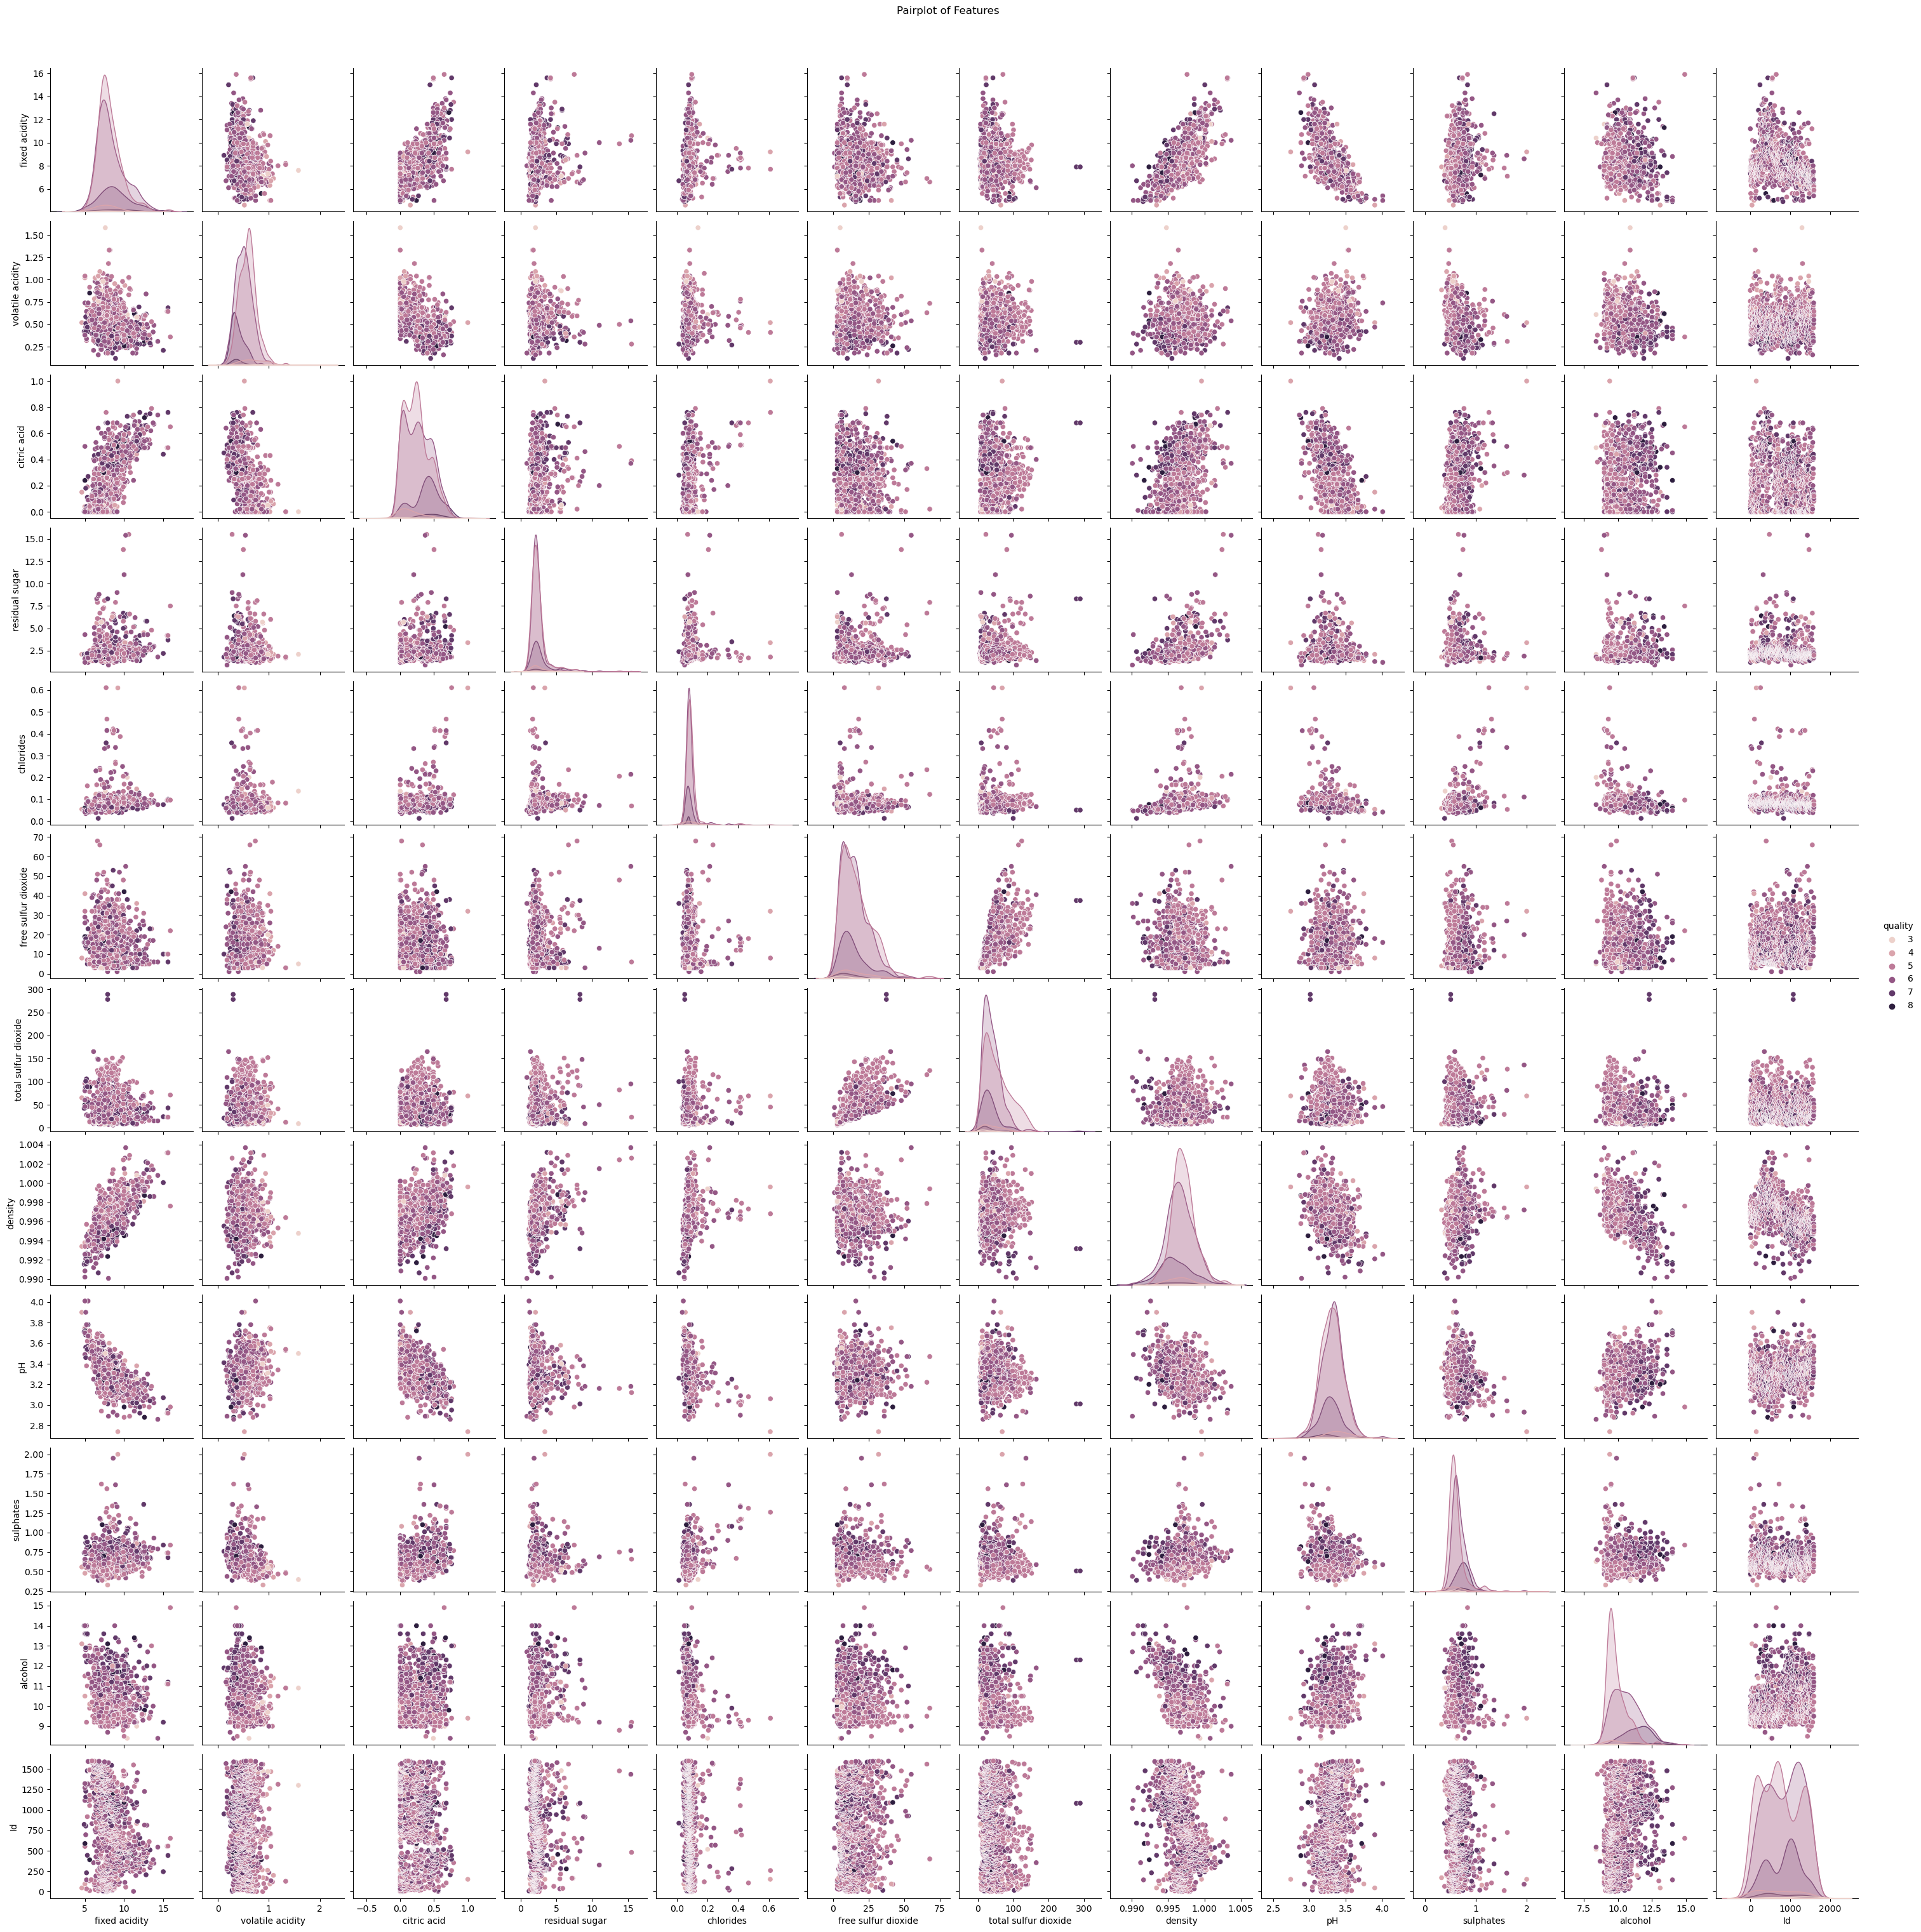

In [8]:
# Pairplot to visualize the relationship between chemical attributes and quality
pair_plot = sns.pairplot(data, hue='quality')
pair_plot.fig.suptitle('Pairplot of Features', y=1.02)
plt.show()

2. **Feature Engineering**

In [10]:
# Selecting deatures and target
X = data.drop(['quality', 'Id'], axis=1)
y = data['quality']

In [11]:
#scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3. **Model Training**

In [13]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
#initialize the model
rf_model = RandomForestClassifier(random_state=42)
#Train model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
#predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [16]:
#evaluate model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=1))

Random Forest Classification Report:
              precision    recall  f1-score   support

           4       1.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.67      0.66      0.66        99
           7       0.68      0.65      0.67        26
           8       1.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.81      0.42      0.42       229
weighted avg       0.70      0.69      0.68       229



In [17]:
#Train Stochastic Gradient Descent Model
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

In [18]:
print("Stochastic Gradient Descent Classification Report:")
print(classification_report(y_test, y_pred_sgd, zero_division=1))

Stochastic Gradient Descent Classification Report:
              precision    recall  f1-score   support

           3       0.00      1.00      0.00         0
           4       0.00      0.00      1.00         6
           5       0.66      0.68      0.67        96
           6       0.62      0.67      0.64        99
           7       0.55      0.23      0.32        26
           8       0.10      0.50      0.17         2

    accuracy                           0.60       229
   macro avg       0.32      0.51      0.47       229
weighted avg       0.60      0.60      0.62       229



In [19]:
#Train Support Vector Classifier (SVC) Model
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

In [20]:
print("Support Vector Classifier Classification Report:")
print(classification_report(y_test, y_pred_svc, zero_division=1))

Support Vector Classifier Classification Report:
              precision    recall  f1-score   support

           4       1.00      0.00      0.00         6
           5       0.70      0.74      0.72        96
           6       0.59      0.69      0.64        99
           7       0.54      0.27      0.36        26
           8       1.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.77      0.34      0.34       229
weighted avg       0.65      0.64      0.62       229



4. **Model Evaluation**

In [22]:
# Compare Model Performance
models = {
    'Random Forest': y_pred_rf,
    'Stochastic Gradient Descent': y_pred_sgd,
    'Support Vector Classifier': y_pred_svc
}

In [23]:
# Print classification reports for each model
for model_name, y_pred in models.items():
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))

Random Forest Classification Report:
              precision    recall  f1-score   support

           4       1.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.67      0.66      0.66        99
           7       0.68      0.65      0.67        26
           8       1.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.81      0.42      0.42       229
weighted avg       0.70      0.69      0.68       229

Stochastic Gradient Descent Classification Report:
              precision    recall  f1-score   support

           3       0.00      1.00      0.00         0
           4       0.00      0.00      1.00         6
           5       0.66      0.68      0.67        96
           6       0.62      0.67      0.64        99
           7       0.55      0.23      0.32        26
           8       0.10      0.50      0.17         2

    accuracy                           0.60